# **<font size=4 color=#BB3D00 face=微软雅黑>使用自相关求周期性</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/find-periodicity-using-autocorrelation.html     
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例：使用自相关帮助验证周期的存在并确定其持续时间</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：使用自相关帮助验证周期的存在并确定其持续时间</font>

测量不确定性和噪声有时会导致难以发现信号中的振荡行为，即使该震荡行为是预期存在的。周期信号的自相关序列与信号本身具有相同的周期特征。因此，自相关可以帮助验证周期的存在并确定其持续时间。以由办公楼内温度计采集的一组温度数据为例。该设备每半小时读取一次读数，持续读取四个月。加载数据并对其绘图。减去均值以重点关注温度波动。将温度转换为摄氏度。测量时间以天为单位。因此，采样率为 2 次测量/小时 × 24 小时/天 = 48 次测量/天。

In [1]:
import scipy.io as scio
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

定义了自相关函数，使用numpy库，并且仿照matlab设置了lags

In [10]:
def xcorr(x,y,timelaggy):
    x = x.flatten()
    y = y.flatten()
    out = np.correlate(x,y,'full')
    midIndex = int(len(out)/2)
    mid = out[midIndex]
    autocor = out/mid
    if timelaggy>len(out)/2:
        autocor = autocor
        lags = np.linspace(-len(out)/2,len(out)/2,2*len(out)+1  )
    else :
        autocor = autocor[midIndex-timelaggy:midIndex+timelaggy+1]
        lags = np.linspace(-timelaggy,timelaggy,2*timelaggy+1)
    return autocor,lags

In [3]:
dataFile1 = './temp.mat'
data1 = scio.loadmat(dataFile1)

In [4]:
tempC = np.array(data1['temp'])
tempC = (tempC-32)*5/9
tempnorm = tempC -  np.mean(tempC)
C = tempnorm.transpose()
C = C.flatten()
C.shape

(5584,)

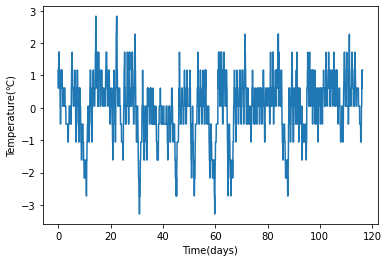

In [5]:
fs = 2*24
t = np.linspace(0,(len(tempnorm)-1),len(tempnorm))/fs
plt.plot(t,tempnorm)
plt.xlabel('Time(days)')
plt.ylabel('Temperature(℃)')
plt.axis('tight')
T = t.transpose()

温度似乎确实有震荡特性，但周期的长度并不容易确定。计算温度的自相关性（时滞为零时该值为 1）。将正时滞和负时滞限制为三周。请注意信号的双周期性。

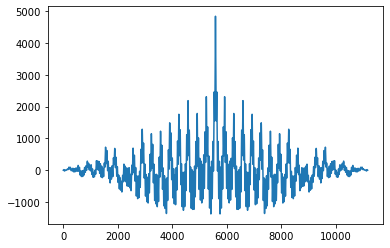

In [12]:
out = np.correlate(C,C,'full')
#plt.xcorr(C,3*7*fs)
plt.plot(out)
#out.shape
len(out)/2
out[int(len(out)/2)]
outt = out[int(len(out)/2)-21*fs:int(len(out)/2)+21*fs]


上图为不设置时滞的自相关计算

(2016,)
(2016,)


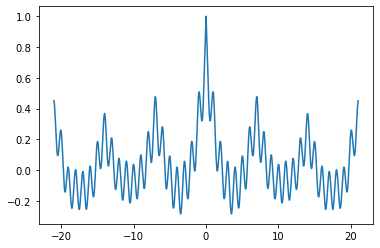

In [13]:
tt = np.linspace(-21,21,2*21*fs)
print(tt.shape)
print(outt.shape)
plt.plot(tt,outt/out[int(len(out)/2)])

通过找到峰值位置并确定它们之间的平均时间差来确定短周期和长周期。要找到长周期，请将 findpeaks 限制为只寻找间隔时间超过短周期且最小高度为 0.3 的峰值。

(41,)


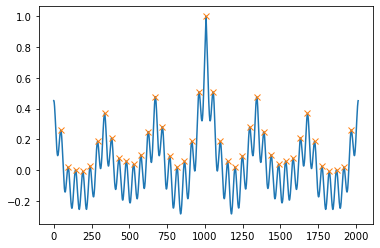

In [14]:
peaks,pros = sig.find_peaks(outt,prominence=0)
plt.plot(outt/out[int(len(out)/2)])
plt.plot(peaks,outt[peaks]/out[int(len(out)/2)],'x')
print(peaks.shape)

(7,)


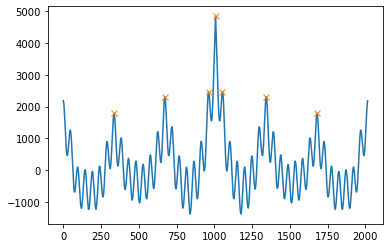

In [15]:
peaks2,pros2 = sig.find_peaks(outt,height=0.3*out[int(len(out)/2)])
print(peaks2.shape)
plt.plot(outt)
plt.plot(peaks2,outt[peaks2],'x')

(41,)


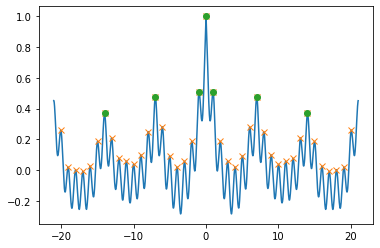

In [16]:
peaks,pros = sig.find_peaks(outt,prominence=0)
peaks2,pros = sig.find_peaks(outt,height=0.3*out[int(len(out)/2)])
plt.plot(tt,outt/out[int(len(out)/2)])
plt.plot(peaks/fs-21,outt[peaks]/out[int(len(out)/2)],'x')
plt.plot(peaks2/fs-21,outt[peaks2]/out[int(len(out)/2)],'o')
print(peaks.shape)

自相关每天和每周都呈现振荡行为，而且非常近似。这是意料之中的，因为大楼内在人们工作时间温度较高，晚上和周末温度较低。

(2017,)
(2016,)


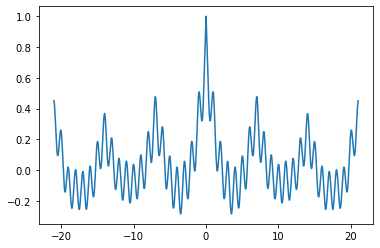

In [18]:
autocor,lags = xcorr(tempnorm,tempnorm,3*7*fs)
print(autocor.shape)
print(lags.shape)
plt.plot(lags/fs,autocor[0:2016])